In [1]:
# import the functions from the fitting module

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns

#import cal_NSD as CN
import warnings
warnings.simplefilter('ignore')
import glob

In [2]:
def set_df(file_path):
    # Load the data from the specified file path
    df = pd.read_csv(file_path)
    df.rename(columns = {df.columns[0]: 'datetime'}, inplace = True)
    # Convert the 'datetime' column to datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])
    # Set 'datetime' as the index
    df.set_index('datetime', inplace=True)
    return df

In [35]:
# Load Obserevd CCN concentration DataFrame
df_ccn = set_df('../../../../../../../../Observation/Refine_Raw_observation/harmonized_data/CCN.csv')
df_nsd = set_df('../../../../../../../../Observation/Refine_Raw_observation/harmonized_data/NSD_abs.csv')  

# df_nsd.set_index('datetime', inplace = True)
# df_nsd['sum'] = df_nsd.sum(axis = 1)

# # Align the indices of CCN_har and df_nsd to ensure comparisons are valid
# CCN_har_aligned = df_ccn.loc[df_ccn.index.intersection(df_nsd.index)]

# # Filter based on the comparison
# CCN_har_filt = CCN_har_aligned[CCN_har_aligned['concSS5'] < df_nsd.loc[CCN_har_aligned.index, 'sum']]

# Load composition mass fraction DataFrame (with black carbon)
comp_data = set_df('../../../../../../../../Observation/Refine_Raw_observation/harmonized_data/composition_mass_conc_ON_mask.csv')

# Calculate the total mass concentration at each time step by summing across all species
total_mass_concentration = comp_data.sum(axis=1)

# Calculate the mass fraction for each species by dividing by the total mass concentration
comp_data_frac = comp_data.div(total_mass_concentration, axis=0)
comp_data_frac['total_mass'] = total_mass_concentration


# Load fitted size distribution (scaled) for mode1
fitted_mode1_scaled = set_df('../../../../../../../../Observation/Refine_Raw_observation/Bimodal_fitting/NSD_scaled_mode1_timeseries.csv')

# Load fitted size distribution (scaled) for mode1
fitted_mode2_scaled = set_df('../../../../../../../../Observation/Refine_Raw_observation/Bimodal_fitting/NSD_scaled_mode2_timeseries.csv')


In [37]:
list(fitted_mode1_scaled)

['c2.82c',
 'c3.16c',
 'c3.55c',
 'c3.98c',
 'c4.47c',
 'c5.01c',
 'c5.62c',
 'c6.31c',
 'c7.08c',
 'c7.94c',
 'c8.91c',
 'c10.0c',
 'c11.2c',
 'c12.6c',
 'c14.1c',
 'c15.8c',
 'c17.8c',
 'c20.0c',
 'c22.4c',
 'c25.1c',
 'c28.2c',
 'c31.6c',
 'c35.5c',
 'c39.8c',
 'c44.7c',
 'c50.1c',
 'c56.2c',
 'c63.1c',
 'c70.8c',
 'c79.4c',
 'c89.1c',
 'c100.0c',
 'c112.0c',
 'c126.0c',
 'c141.0c',
 'c158.0c',
 'c178.0c',
 'c200.0c',
 'c224.0c',
 'c251.0c',
 'c282.0c',
 'c316.0c',
 'c355.0c',
 'c398.0c',
 'c447.0c',
 'c501.0c',
 'c562.0c',
 'c631.0c',
 'c708.0c',
 'c794.0c',
 'c891.0c',
 'c1000.0c']

In [38]:
# Step 1: Find common indices across all DataFrames
common_index = df_ccn.index.intersection(df_nsd.index)
common_index = common_index.intersection(comp_data_frac.index)
common_index = common_index.intersection(fitted_mode1_scaled.index)
common_index = common_index.intersection(fitted_mode2_scaled.index)

# Step 2: Reindex each DataFrame to the common index for alignment
df_ccn_aligned = df_ccn.loc[common_index]
df_nsd_aligned = df_nsd.loc[common_index]
comp_data_frac_aligned = comp_data_frac.loc[common_index]
fitted_mode1_scaled_aligned = fitted_mode1_scaled.loc[common_index]
fitted_mode2_scaled_aligned = fitted_mode2_scaled.loc[common_index]

df_ccn_aligned.to_csv('CCN.csv')
fitted_mode1_scaled_aligned.to_csv('NSD_mode1.csv')
fitted_mode2_scaled_aligned.to_csv('NSD_mode2.csv')
comp_data_frac.to_csv('comp.csv')

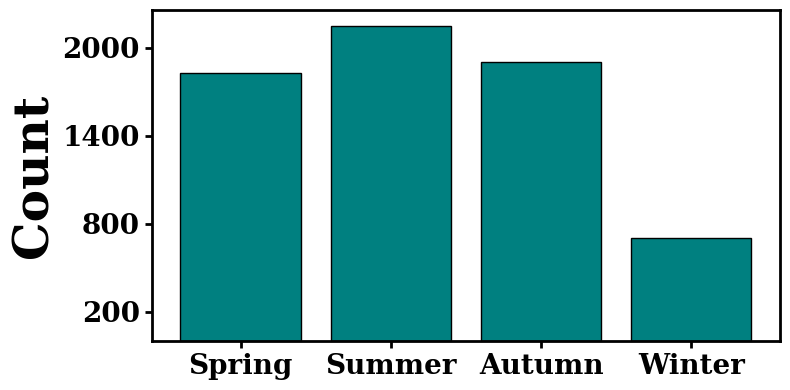

In [39]:
# Define a function to get the season from the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Ensure 'fitted_mode1_har' has a datetime index
if not isinstance(fitted_mode1_scaled_aligned.index, pd.DatetimeIndex):
    raise ValueError("The index of 'fitted_mode1_har' must be a DatetimeIndex")

# Create a new column for the season based on the datetime index
fitted_mode1_scaled_aligned['Season'] = fitted_mode1_scaled_aligned.index.month.map(get_season)

# Count the number of data points in each season
season_counts = fitted_mode1_scaled_aligned['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(season_counts.index, season_counts.values, color='teal', edgecolor='black')

# Customize the appearance
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Set labels and title with bold serif font
#ax.set_xlabel('Season', fontsize=16, fontweight='bold', fontname='serif')
ax.set_ylabel('Count', fontsize=35, fontweight='bold', fontname='serif')
#ax.set_title('Data Points by Season', fontsize=18, fontweight='bold', fontname='serif')
ax.set_yticks([200, 800, 1400, 2000])
# Set tick parameters with bold serif font
ax.tick_params(axis='y', length=5, labelsize=14, width=2)
ax.tick_params(axis='x', length=5, labelsize=14, width=2)

# Set tick label font to serif and bold
ax.set_xticks(range(len(season_counts.index)))  # Set the x-ticks to the positions of the season labels
ax.set_xticklabels(season_counts.index, fontsize = 20, fontname='serif', fontweight='bold')
ax.set_yticklabels(ax.get_yticks(), fontsize = 20, fontname='serif', fontweight='bold')

plt.tight_layout()
plt.savefig('data_points_by_season.png', dpi = 500)
plt.show()

In [40]:
df_ccn_aligned

,SC1,SC2,SC3,SC4,SC5
datetime,,,,,
2016-08-16 09:00:00,102.75,182.79,248.70,249.63,250.62
2016-08-16 11:00:00,112.11,212.34,239.46,263.94,323.40
2016-08-16 13:00:00,58.60,169.96,210.44,148.36,212.01
2016-08-16 15:00:00,32.89,80.87,104.85,111.25,101.16
2016-08-17 11:00:00,122.56,363.89,438.07,569.09,716.93
...,...,...,...,...,...
2020-04-01 11:00:00,16.78,35.98,54.32,65.35,73.87
2020-04-01 15:00:00,19.99,64.06,82.22,87.80,108.01
2020-04-01 17:00:00,17.06,71.94,94.67,108.03,216.22


## A little error check

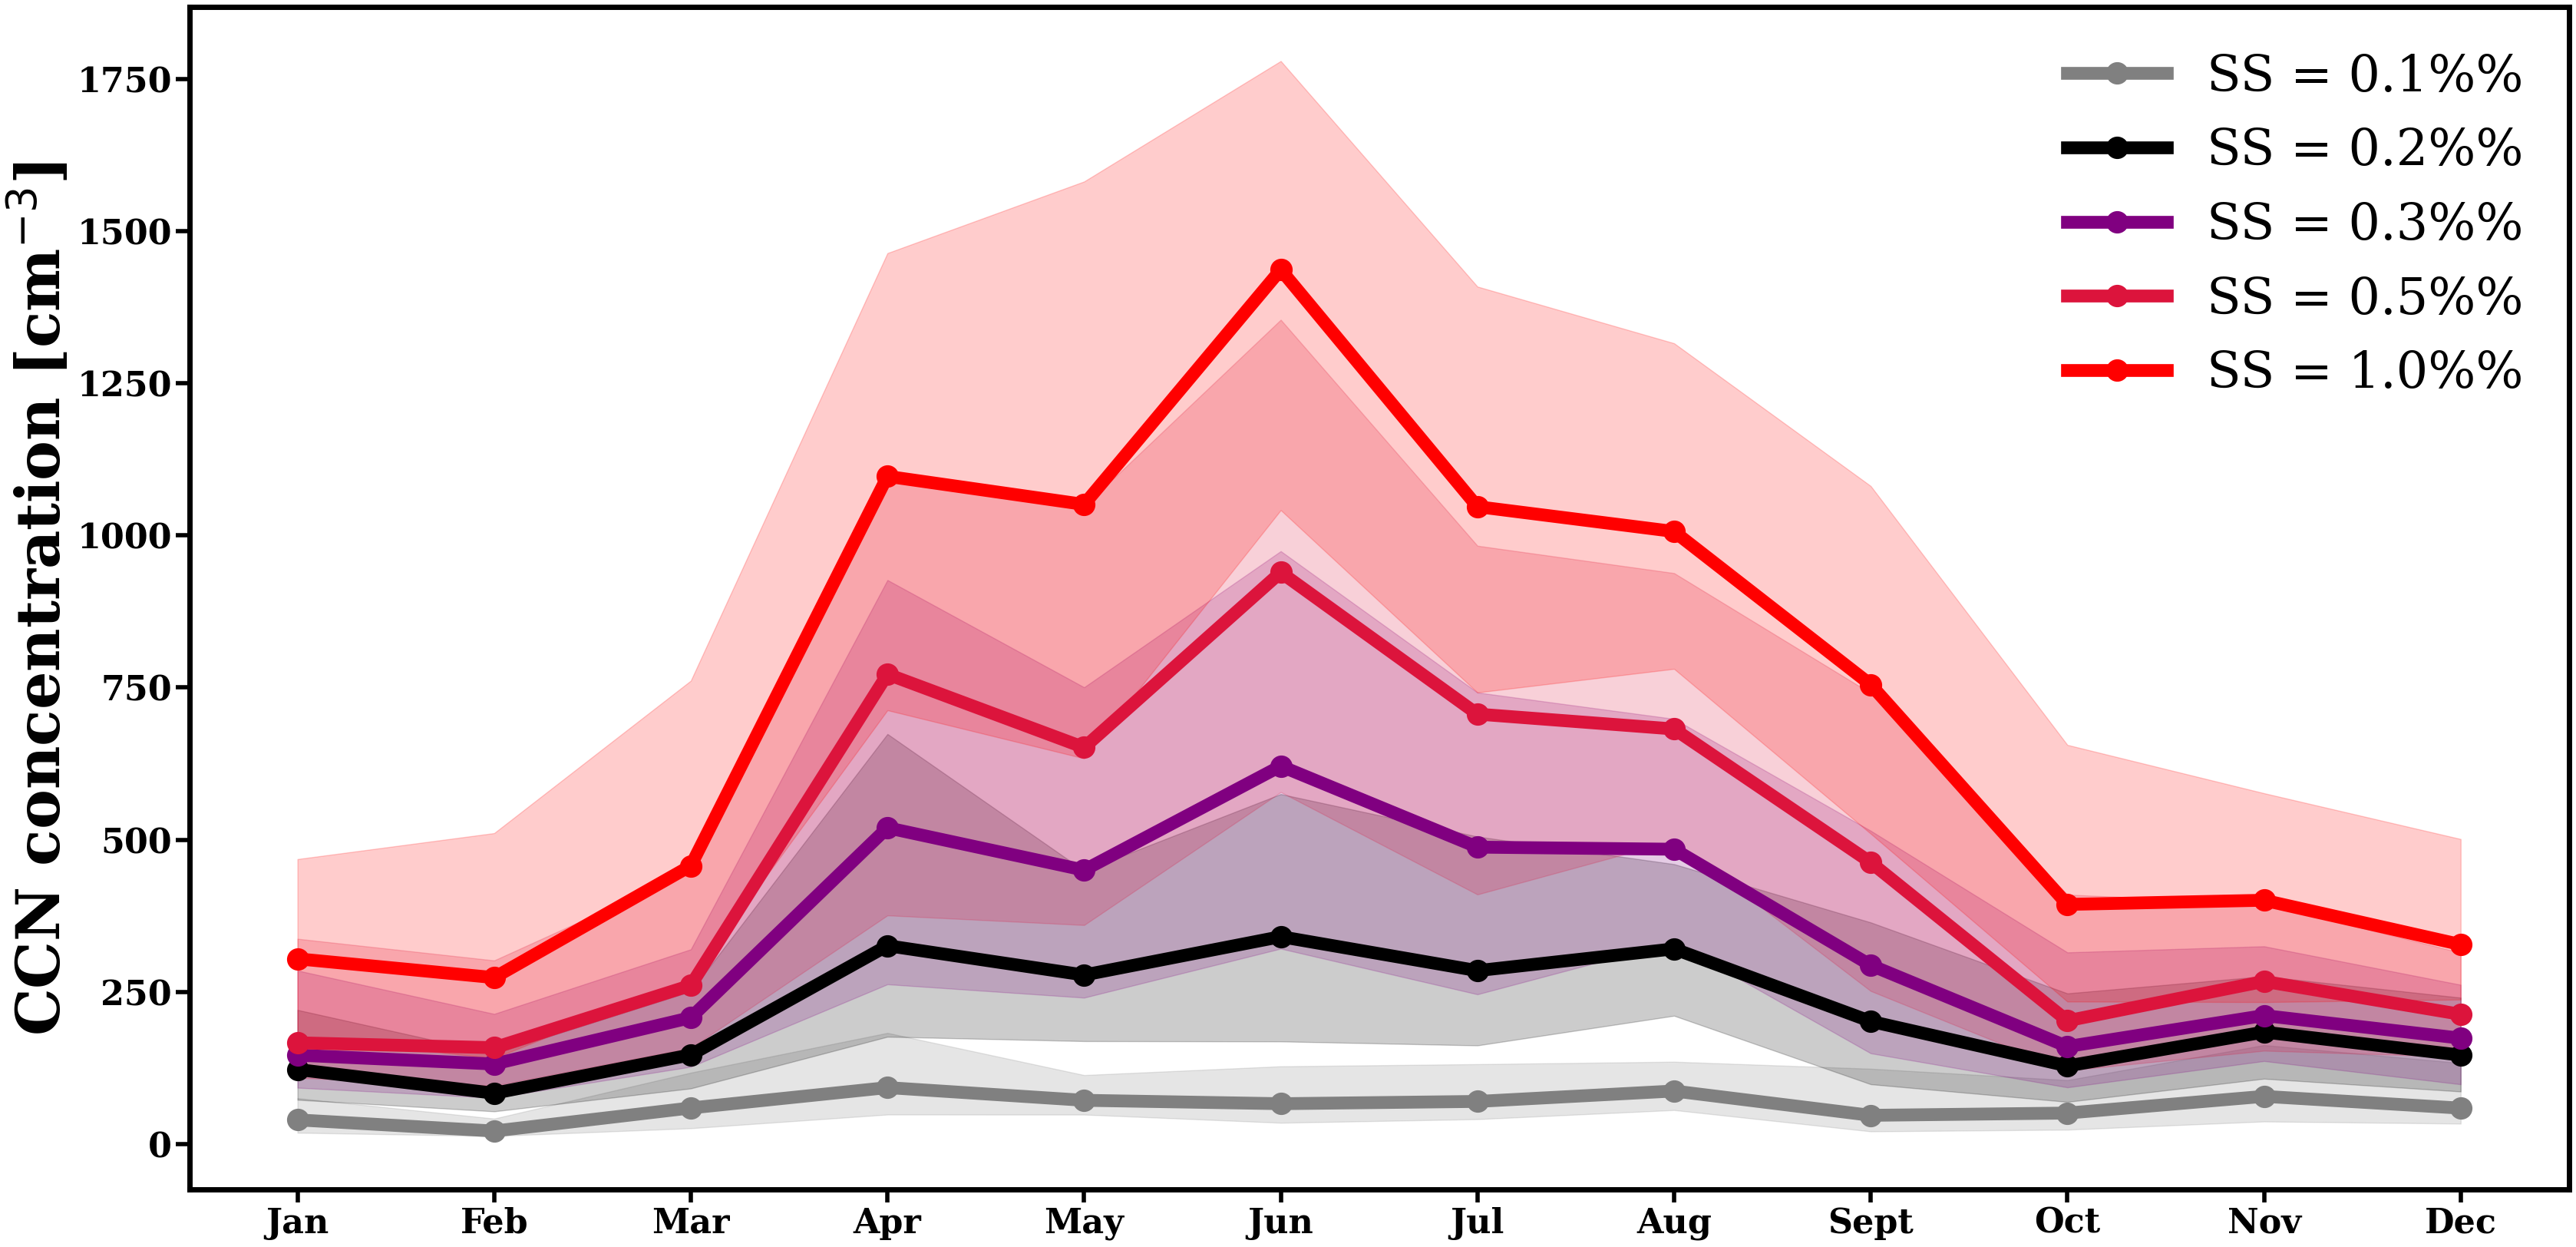

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_CCN_obs is a DataFrame with a DateTime index
# df_CCN_obs = pd.read_csv('your_data.csv', index_col='datetime', parse_dates=True)

# Generate the lists of monthly statistics
monthly_medians_ls = []
monthly_25_ls = []
monthly_75_ls = []
for i in range(1, 13):
    monthly_medians = df_ccn_aligned[df_ccn_aligned.index.month == i].median()
    monthly_lower = df_ccn_aligned[df_ccn_aligned.index.month == i].quantile(0.25)
    monthly_upper = df_ccn_aligned[df_ccn_aligned.index.month == i].quantile(0.75)
    
    monthly_medians_ls.append(monthly_medians.tolist())
    monthly_25_ls.append(monthly_lower.tolist())
    monthly_75_ls.append(monthly_upper.tolist())

# Define colors and labels
colors = ['grey', 'black', 'purple', 'crimson', 'red', 'red']
x_ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ss = ['0.1%', '0.2%', '0.3%', '0.5%', '1.0%']

# Create the plot
fig, ax1 = plt.subplots(1, 1, figsize=(40, 20), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.03, hspace=0.02)

# Plot each supersaturation level with markers
for idx, color in enumerate(colors[:5]):  # Loop over the first five colors
    ax1.plot(x_ticks, [sublist[idx] for sublist in monthly_medians_ls], 
             color=color, linewidth=12, marker='o', markersize=20, label=f'SS = {ss[idx]}%')
    ax1.fill_between(x_ticks, [sublist[idx] for sublist in monthly_25_ls], 
                     [sublist[idx] for sublist in monthly_75_ls], alpha=0.2, color=color)

# Set font properties for tick labels
for tick in ax1.get_xticklabels():
    tick.set_fontname("serif")
    tick.set_fontweight("bold")

for tick in ax1.get_yticklabels():
    tick.set_fontname("serif")
    tick.set_fontweight("bold")

# Set the axis properties
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(5)
    ax1.spines[axis].set_color('k')

# Set the ylabel with LaTeX formatting
ax1.set_ylabel(r'CCN concentration [cm$^{-3}$]', fontsize=56, fontweight='bold', fontname='serif')

# Set tick parameters
ax1.tick_params(axis='y', length=13, labelsize=32, width=4)
ax1.tick_params(axis='x', length=12, labelsize=32, width=4)

# Set legend properties
ax1.legend(frameon=False, prop={'size': 47, 'family': 'serif'})

# Save the figure
#plt.savefig('figures/monthly_Observed_CCN.png', dpi=600)

# Show the plot
plt.show()


In [32]:
def get_seasonal_data(df):
    
    df_sp = df[(df.index.month == 3)|(df.index.month == 4)|
             (df.index.month == 5)]
    df_s = df[(df.index.month == 5)|(df.index.month == 6)|
             (df.index.month == 7)]
    df_a = df[(df.index.month == 9)|(df.index.month == 10)|
             (df.index.month == 11)]
    df_w = df[(df.index.month == 12)|(df.index.month == 1)|
             (df.index.month == 2)]
    
    return [df_sp, df_s, df_a, df_w] # [Spring, summer, autumn and winter]